In [3]:
%matplotlib inline

import time
import datetime as dt
import os
import glob
import json

import itertools as it

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

os.getcwd()

'/home/edmz/Data Covid/Code'

In [4]:
from dicts_paths_v1 import *
from calc_functions_v1 import *
from graph_functions_v1 import *

https://www.data.gouv.fr/fr/datasets/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/

https://www.data.gouv.fr/fr/datasets/donnees-relatives-aux-resultats-des-tests-virologiques-covid-19/

https://www.data.gouv.fr/fr/datasets/donnees-relatives-aux-personnes-vaccinees-contre-la-covid-19-1/

In [5]:
print(today)
print(date_choice)
print(date)
print(date_text)

2021-04-06
2021-04-05
2021-04-05
05/04/2021


### File paths

In [6]:
print('SIDEP\n   Données d\'entrée :') 
print(path_test)
print(fname_temp_test)
print(fname_output_test)

print('Données hospitalières\n   Données d\'entrée :') 
print(path_hosp)
print(fname_temp_hosp)
print(fname_output_hosp)

print('VAC-SI\n   Données d\'entrée :') 
print(path_vac)
print(fname_temp_vac)
print(fname_output_vac)

SIDEP
   Données d'entrée :
['../Data/sp-pos-quot-dep-2021-04-05-19h25.csv']
./Temp/sp-pos-quot-dep-2021-04-05-19h25
../Output/sp-pos-quot-dep-2021-04-05-19h25
Données hospitalières
   Données d'entrée :
['../Data/donnees-hospitalieres-classe-age-covid19-2021-04-05-19h19.csv']
./Temp/donnees-hospitalieres-classe-age-covid19-2021-04-05-19h19
../Output/donnees-hospitalieres-classe-age-covid19-2021-04-05-19h19
VAC-SI
   Données d'entrée :
['../Data/vacsi-a-dep-2021-04-05-19h30.csv']
./Temp/vacsi-a-dep-2021-04-05-19h30
../Output/vacsi-a-dep-2021-04-05-19h30


### Dictionnaries

In [7]:
print('Dict. reg_name\n     "11" :', reg_name['11'])
print('Dict. reg2dep\n     "Corse" :', reg2dep['Corse'])
print('Dict. dep2reg\n     "75" :', dep2reg['75'])
print('Dict. dep_name\n     "67" :', dep_name['67'])
print('Dict. class_2_3C\n      29 : ', class_2_3C[29])
print('Dict reg_3C_pop\n     "Grand Est" :', reg_3C_pop['Grand Est'])
print('Dict reg_2lignes\n      "Auvergne-Rhône-Alpes" :', reg_2lignes["Auvergne-Rhône-Alpes"], sep = '\n')

Dict. reg_name
     "11" : Île-de-France
Dict. reg2dep
     "Corse" : ['2A', '2B']
Dict. dep2reg
     "75" : Île-de-France
Dict. dep_name
     "67" : Bas-Rhin
Dict. class_2_3C
      29 :  0-29
Dict reg_3C_pop
     "Grand Est" : {'0-29': 1874571, '30-59': 2124342, '60+': 1512834, 'whole': 5511747}
Dict reg_2lignes
      "Auvergne-Rhône-Alpes" :
Auvergne-
Rhône-Alpes


### Functions

In [8]:
help(groupby_sum)

Help on function groupby_sum in module calc_functions_v1:

groupby_sum(d, columns)
    d: dataframe
    columns: list of column names
    returns: dataframe is grouped according to columns fed in
            other columns are summed
            dataframe is then formatted into a dataframe



In [9]:
help(columns_first)

Help on function columns_first in module calc_functions_v1:

columns_first(d, columns)
    d: dataframe
    by: a list of column names
    returns: dataframe reordered



In [10]:
help(calc_hebdo)

Help on function calc_hebdo in module calc_functions_v1:

calc_hebdo(d, columns_to_group, columns_to_sum)
    d: a dataframe
    columns_to_group: list of columns from which groups will be formed
            for example ['entity', 'three_class'] -> will calculate hebdo sums for (regionA, class1), (regionA, class2), etc.
    columns_to_sum: list of columns which values will be summed on a week-wise base
            for example ['P', 'T']



# Traitement des données SIDEP

In [11]:
fname = path_test[0]
din = pd.read_csv(fname, sep = ';', parse_dates = ['jour'], dtype = {'dep': str})
din.sample(3)

,dep,jour,P,T,cl_age90,pop
30382,09,2020-10-22,2,15,9,14332.0
259084,72,2020-10-13,16,267,19,72034.0
329714,92,2020-07-26,0,32,9,201673.0


In [12]:
d = din.copy()
d = d.rename(columns = {'dep': 'entity'})
d = columns_first(d, columns = ['entity', 'cl_age90', 'jour'])
d_dep = d
d_dep.sample(3)

,entity,cl_age90,jour,P,T,pop
131519,36,39,2021-01-24,1,6,20646.0
121293,33,79,2021-03-10,15,442,133693.0
8358,03,90,2020-08-30,0,6,7107.0


In [13]:
d = din.copy()
d['reg'] = d['dep'].map(lambda x: dep2reg[x])
d = d.drop(columns = ['dep'])
dg = groupby_sum(d, columns = ['reg', 'jour', 'cl_age90'])
dg = d.rename(columns = {'reg': 'entity'})
dg = columns_first(dg, columns = ['entity', 'cl_age90', 'jour'])
d_reg = dg
d_reg.sample(3)

,entity,cl_age90,jour,P,T,pop
231502,Nouvelle-Aquitaine,79,2021-01-13,10,219,68265.0
206610,Grand Est,89,2021-01-25,66,450,51288.0
164131,Centre-Val de Loire,9,2021-03-05,6,77,83183.0


In [14]:
d = din.copy()
d = d.drop(columns = ['dep'])
dg = groupby_sum(d, columns = ['jour', 'cl_age90'])
dg['entity'] = 'France entière'
dg = columns_first(dg, columns = ['entity', 'cl_age90', 'jour'])
d_nat = dg
d_nat.sample(3)

,entity,cl_age90,jour,P,T,pop
2802,France entière,79,2021-01-22,1602,26712,5.695639e+06
992,France entière,19,2020-08-11,292,9977,8.336486e+06
626,France entière,90,2020-07-08,11,1768,9.125806e+05


In [15]:
d = pd.merge(d_dep, d_reg, how = 'outer')
dout = pd.merge(d, d_nat, how = 'outer')
dout = columns_first(dout, columns = ['entity', 'cl_age90', 'jour'])
dout.head(3)

,entity,cl_age90,jour,P,T,pop
0,01,9,2020-05-13,0,16,83001.0
1,01,19,2020-05-13,1,17,84665.0
2,01,29,2020-05-13,0,34,65496.0


In [16]:
dout.tail(3)

,entity,cl_age90,jour,P,T,pop
747172,France entière,79,2021-04-02,1867,27514,5.695639e+06
747173,France entière,89,2021-04-02,1033,15357,3.245281e+06
747174,France entière,90,2021-04-02,350,7367,9.125806e+05


In [17]:
fname = fname_temp_test + '-tot.csv'
dout.to_csv(fname, sep = ';', index = False)

### SIDEP - 3 classes d'âge

In [18]:
fname = fname_temp_test + '-tot.csv'
din = pd.read_csv(fname, 
                sep = ';', 
                parse_dates = ['jour'], 
                dtype = {'entity': str},
                skiprows = [])
din.tail(3)

,entity,cl_age90,jour,P,T,pop
747172,France entière,79,2021-04-02,1867,27514,5.695639e+06
747173,France entière,89,2021-04-02,1033,15357,3.245281e+06
747174,France entière,90,2021-04-02,350,7367,9.125806e+05


In [19]:
d = din.copy()
d['three_class'] = d['cl_age90'].map(lambda x: class_2_3C[x])
d = d.drop(columns = 'cl_age90')
dg = groupby_sum(d,['entity', 'jour', 'three_class'])
dg = columns_first(dg, columns = ['entity', 'three_class', 'jour'])
dout = dg
dout.tail(10)

,entity,three_class,jour,P,T,pop
154690,Île-de-France,60+,2021-03-31,1582,15567,2517033.0
154691,Île-de-France,whole,2021-03-31,13626,134632,12278210.0
154692,Île-de-France,0-29,2021-04-01,4923,65869,4792882.0
154693,Île-de-France,30-59,2021-04-01,6190,61540,4968295.0
154694,Île-de-France,60+,2021-04-01,1546,15442,2517033.0
154695,Île-de-France,whole,2021-04-01,12664,142905,12278210.0
154696,Île-de-France,0-29,2021-04-02,4816,69009,4792882.0
154697,Île-de-France,30-59,2021-04-02,5871,66808,4968295.0
154698,Île-de-France,60+,2021-04-02,1418,16171,2517033.0
154699,Île-de-France,whole,2021-04-02,12108,152071,12278210.0


In [20]:
fname = fname_temp_test + '-tot-3C.csv'
dout.to_csv(fname, sep = ';', index = False)

### SIDEP - calculs chiffres hebdomadaires

In [21]:
fname = fname_temp_test + '-tot-3C.csv'
din = pd.read_csv(fname, 
                sep = ';', 
                parse_dates = ['jour'], 
                dtype = {'entity': str},
                skiprows = [])
din.sample(3)

,entity,three_class,jour,P,T,pop
45595,35,whole,2020-06-05,1,528,1082073.0
12546,10,60+,2020-12-10,14,454,87700.0
93373,71,30-59,2021-02-05,70,1206,199934.0


In [22]:
d = din.copy()

dh = calc_hebdo(d, 
           columns_to_group = ['entity', 'three_class'], 
           columns_to_sum = ['P', 'T'])

0.38 s : (P hebdo, T hebdo) calculated for (01, 0-29)
0.77 s : (P hebdo, T hebdo) calculated for (01, 30-59)
1.16 s : (P hebdo, T hebdo) calculated for (01, 60+)
1.54 s : (P hebdo, T hebdo) calculated for (01, whole)
1.94 s : (P hebdo, T hebdo) calculated for (02, 0-29)
2.33 s : (P hebdo, T hebdo) calculated for (02, 30-59)
2.75 s : (P hebdo, T hebdo) calculated for (02, 60+)
3.14 s : (P hebdo, T hebdo) calculated for (02, whole)
3.53 s : (P hebdo, T hebdo) calculated for (03, 0-29)
3.91 s : (P hebdo, T hebdo) calculated for (03, 30-59)
4.30 s : (P hebdo, T hebdo) calculated for (03, 60+)
4.69 s : (P hebdo, T hebdo) calculated for (03, whole)
5.08 s : (P hebdo, T hebdo) calculated for (04, 0-29)
5.47 s : (P hebdo, T hebdo) calculated for (04, 30-59)
5.85 s : (P hebdo, T hebdo) calculated for (04, 60+)
6.24 s : (P hebdo, T hebdo) calculated for (04, whole)
6.62 s : (P hebdo, T hebdo) calculated for (05, 0-29)
7.01 s : (P hebdo, T hebdo) calculated for (05, 30-59)
7.40 s : (P hebdo, T he

57.46 s : (P hebdo, T hebdo) calculated for (37, 30-59)
57.83 s : (P hebdo, T hebdo) calculated for (37, 60+)
58.20 s : (P hebdo, T hebdo) calculated for (37, whole)
58.62 s : (P hebdo, T hebdo) calculated for (38, 0-29)
59.01 s : (P hebdo, T hebdo) calculated for (38, 30-59)
59.39 s : (P hebdo, T hebdo) calculated for (38, 60+)
59.77 s : (P hebdo, T hebdo) calculated for (38, whole)
60.15 s : (P hebdo, T hebdo) calculated for (39, 0-29)
60.52 s : (P hebdo, T hebdo) calculated for (39, 30-59)
60.90 s : (P hebdo, T hebdo) calculated for (39, 60+)
61.28 s : (P hebdo, T hebdo) calculated for (39, whole)
61.66 s : (P hebdo, T hebdo) calculated for (40, 0-29)
62.04 s : (P hebdo, T hebdo) calculated for (40, 30-59)
62.42 s : (P hebdo, T hebdo) calculated for (40, 60+)
62.80 s : (P hebdo, T hebdo) calculated for (40, whole)
63.18 s : (P hebdo, T hebdo) calculated for (41, 0-29)
63.56 s : (P hebdo, T hebdo) calculated for (41, 30-59)
63.93 s : (P hebdo, T hebdo) calculated for (41, 60+)
64.31 

114.81 s : (P hebdo, T hebdo) calculated for (74, 30-59)
115.20 s : (P hebdo, T hebdo) calculated for (74, 60+)
115.59 s : (P hebdo, T hebdo) calculated for (74, whole)
115.97 s : (P hebdo, T hebdo) calculated for (75, 0-29)
116.35 s : (P hebdo, T hebdo) calculated for (75, 30-59)
116.74 s : (P hebdo, T hebdo) calculated for (75, 60+)
117.13 s : (P hebdo, T hebdo) calculated for (75, whole)
117.51 s : (P hebdo, T hebdo) calculated for (76, 0-29)
117.89 s : (P hebdo, T hebdo) calculated for (76, 30-59)
118.27 s : (P hebdo, T hebdo) calculated for (76, 60+)
118.66 s : (P hebdo, T hebdo) calculated for (76, whole)
119.05 s : (P hebdo, T hebdo) calculated for (77, 0-29)
119.44 s : (P hebdo, T hebdo) calculated for (77, 30-59)
119.82 s : (P hebdo, T hebdo) calculated for (77, 60+)
120.21 s : (P hebdo, T hebdo) calculated for (77, whole)
120.64 s : (P hebdo, T hebdo) calculated for (78, 0-29)
121.02 s : (P hebdo, T hebdo) calculated for (78, 30-59)
121.40 s : (P hebdo, T hebdo) calculated fo

169.41 s : (P hebdo, T hebdo) calculated for (France entière, 60+)
169.82 s : (P hebdo, T hebdo) calculated for (France entière, whole)
170.20 s : (P hebdo, T hebdo) calculated for (Grand Est, 0-29)
170.58 s : (P hebdo, T hebdo) calculated for (Grand Est, 30-59)
170.95 s : (P hebdo, T hebdo) calculated for (Grand Est, 60+)
171.35 s : (P hebdo, T hebdo) calculated for (Grand Est, whole)
171.76 s : (P hebdo, T hebdo) calculated for (Hauts-de-France, 0-29)
172.15 s : (P hebdo, T hebdo) calculated for (Hauts-de-France, 30-59)
172.53 s : (P hebdo, T hebdo) calculated for (Hauts-de-France, 60+)
172.93 s : (P hebdo, T hebdo) calculated for (Hauts-de-France, whole)
173.31 s : (P hebdo, T hebdo) calculated for (Normandie, 0-29)
173.69 s : (P hebdo, T hebdo) calculated for (Normandie, 30-59)
174.08 s : (P hebdo, T hebdo) calculated for (Normandie, 60+)
174.45 s : (P hebdo, T hebdo) calculated for (Normandie, whole)
174.83 s : (P hebdo, T hebdo) calculated for (Nouvelle-Aquitaine, 0-29)
175.22 s 

In [23]:
dh.sample(3)

,entity,three_class,jour,P,T,pop,P hebdo,T hebdo
92522,71,60+,2020-07-07,1,240,184514.0,7.0,1100.0
125615,971,whole,2020-12-02,7,349,376879.0,73.0,2246.0
1351,02,whole,2020-05-25,16,235,526050.0,51.0,1229.0


In [24]:
d = dh
d['incidence hebdo'] = d['P hebdo'] / d['pop'] * 100000
d['positivite hebdo'] = d['P hebdo'] / d['T hebdo'] * 100
d['taux de test hebdo'] = d['T hebdo'] / d['pop'] * 100000
d.sample(3)

,entity,three_class,jour,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,taux de test hebdo
150198,Outre-mer,60+,2020-11-03,75,1153,424767.105505,356.0,6190.0,83.810633,5.751212,1457.269153
79468,61,0-29,2020-06-24,0,48,83751.000000,2.0,273.0,2.388031,0.732601,325.966257
120714,92,60+,2021-02-15,154,2322,333425.000000,635.0,11993.0,190.447627,5.294755,3596.910850


In [25]:
d.tail(3)

,entity,three_class,jour,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,taux de test hebdo
154697,Île-de-France,30-59,2021-04-02,5871,66808,4968295.0,39151.0,357639.0,788.016815,10.947072,7198.425214
154698,Île-de-France,60+,2021-04-02,1418,16171,2517033.0,10134.0,102706.0,402.616891,9.866999,4080.439152
154699,Île-de-France,whole,2021-04-02,12108,152071,12278210.0,82228.0,843433.0,669.706741,9.749204,6869.348219


In [26]:
fname = fname_temp_test + '-tot-3C-processed.csv'
d.to_csv(fname, sep = ';', index = False)

# Traitement des données hospitalières

In [27]:
fname = path_hosp[0]
din = pd.read_csv(fname, sep = ';', parse_dates = ['jour'], dtype = {'dep': str})
din.sample(3)

,reg,cl_age90,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
38457,6,9,2020-09-28,0,0,NaN,NaN,NaN,18,0
66055,52,0,2021-02-14,895,94,NaN,NaN,NaN,8057,1899
40143,75,39,2020-10-06,14,4,NaN,NaN,NaN,165,2


In [28]:
d = din.copy()
d['entity'] = (d['reg']
               .map(lambda x: reg_name[str(x)] )
               .replace({
                   'Guadeloupe':'Outre-mer',
                   'Martinique':'Outre-mer',
                   'Guyane':'Outre-mer',
                   'La Réunion':'Outre-mer',
                   'Mayotte':'Outre-mer',
               })
              )
d = columns_first(d, columns = ['entity'])
d = d.drop(columns = ['reg'])
d.head(3)

,entity,cl_age90,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
0,Outre-mer,0,2020-03-18,0,0,NaN,NaN,NaN,0,0
1,Outre-mer,9,2020-03-18,0,0,NaN,NaN,NaN,0,0
2,Outre-mer,19,2020-03-18,0,0,NaN,NaN,NaN,0,0


In [29]:
d['three_class'] = d['cl_age90'].map(lambda x: class_2_3C[x])
d = d.drop(columns = 'cl_age90')
dg = groupby_sum(d,['entity', 'jour', 'three_class',])
# dg = (dg.reset_index()
#       .drop(columns = ['cl_age90'])
#             )
dg = columns_first(dg, ['entity', 'three_class', 'jour',])
d_reg = dg.copy()
d_reg.tail(3)

,entity,three_class,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
21501,Île-de-France,30-59,2021-04-05,1879,570,1115.0,149.0,45.0,24139,1273
21502,Île-de-France,60+,2021-04-05,5598,1026,2913.0,1622.0,37.0,47893,15648
21503,Île-de-France,whole,2021-04-05,7737,1634,4221.0,1788.0,94.0,77222,17064


In [30]:
d = d_reg.copy()
dg = groupby_sum(d, columns = ['jour', 'three_class',])
dg['entity'] = 'France entière'
dg = columns_first(dg, columns = ['entity', 'three_class', 'jour',])
d_nat = dg
d_nat.sample(3)

,entity,three_class,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
1323,France entière,whole,2021-02-11,26963,3327,0.0,0.0,0.0,238722,57106
62,France entière,60+,2020-04-02,18598,4030,0.0,0.0,0.0,5738,4180
1499,France entière,whole,2021-03-27,27259,4791,14873.0,7253.0,342.0,289350,68466


In [31]:
d_tot = pd.merge(d_reg, d_nat, how = 'outer')
d_tot = d_tot.drop(columns = ['HospConv', 'SSR_USLD', 'autres', 'rad'])
d_tot.sample(3)

,entity,three_class,jour,hosp,rea,dc
8322,Grand Est,60+,2020-08-25,385,17,3482
8126,Grand Est,60+,2020-07-07,830,37,3409
15811,Outre-mer,whole,2020-07-08,211,45,83


In [32]:
d = d_tot
d = calc_delta_hebdo(d, columns_to_group = ['entity', 'three_class'], columns_to_delta = ['dc'])

0.51 s : (dc hebdo) calculated for (Auvergne-Rhône-Alpes, 0-29)
1.03 s : (dc hebdo) calculated for (Auvergne-Rhône-Alpes, 30-59)
1.54 s : (dc hebdo) calculated for (Auvergne-Rhône-Alpes, 60+)
2.04 s : (dc hebdo) calculated for (Auvergne-Rhône-Alpes, whole)
2.55 s : (dc hebdo) calculated for (Bourgogne-Franche-Comté, 0-29)
3.05 s : (dc hebdo) calculated for (Bourgogne-Franche-Comté, 30-59)
3.56 s : (dc hebdo) calculated for (Bourgogne-Franche-Comté, 60+)
4.07 s : (dc hebdo) calculated for (Bourgogne-Franche-Comté, whole)
4.58 s : (dc hebdo) calculated for (Bretagne, 0-29)
5.10 s : (dc hebdo) calculated for (Bretagne, 30-59)
5.62 s : (dc hebdo) calculated for (Bretagne, 60+)
6.15 s : (dc hebdo) calculated for (Bretagne, whole)
6.68 s : (dc hebdo) calculated for (Centre-Val de Loire, 0-29)
7.19 s : (dc hebdo) calculated for (Centre-Val de Loire, 30-59)
7.70 s : (dc hebdo) calculated for (Centre-Val de Loire, 60+)
8.21 s : (dc hebdo) calculated for (Centre-Val de Loire, whole)
8.74 s : (dc

In [33]:
d['taux hosp'] = d.apply(lambda x: x['hosp'] / reg_3C_pop 
                                                    [ x['entity'] ]
                                                    [ x['three_class'] ] * 100000, 
                         axis = "columns")
d['taux rea'] = d.apply(lambda x: x['rea'] / reg_3C_pop
                                                    [ x['entity'] ]
                                                    [ x['three_class'] ] * 100000, 
                        axis = "columns")
d['taux décès'] = d.apply(lambda x: x['dc hebdo'] / reg_3C_pop
                                                    [ x['entity'] ]
                                                    [ x['three_class'] ] * 100000, 
                        axis = "columns")
d

,entity,three_class,jour,hosp,rea,dc,dc hebdo,taux hosp,taux rea,taux décès
0,Auvergne-Rhône-Alpes,0-29,2020-03-18,4,0,0,0.0,0.141085,0.000000,0.000000
1,Auvergne-Rhône-Alpes,30-59,2020-03-18,33,11,1,0.0,1.069485,0.356495,0.000000
2,Auvergne-Rhône-Alpes,60+,2020-03-18,127,24,6,0.0,6.014371,1.136574,0.000000
3,Auvergne-Rhône-Alpes,whole,2020-03-18,172,35,7,0.0,2.141334,0.435737,0.000000
4,Auvergne-Rhône-Alpes,0-29,2020-03-19,5,1,0,0.0,0.176356,0.035271,0.000000
...,...,...,...,...,...,...,...,...,...,...
23035,France entière,whole,2021-04-04,29356,5341,70574,1977.0,43.739853,7.957983,2.945690
23036,France entière,0-29,2021-04-05,483,60,74,3.0,2.048652,0.254491,0.012725
23037,France entière,30-59,2021-04-05,5699,1534,3182,86.0,22.191562,5.973303,0.334879
23038,France entière,60+,2021-04-05,23461,3785,67139,1713.0,131.378362,21.195478,9.592564


In [34]:
dout = d
fname = fname_temp_hosp + '-processed.csv'
dout.to_csv(fname, sep = ';', index = False)

# Données VAC-SI 

In [35]:
fname = path_vac[0]
din = pd.read_csv(fname, sep = ';', parse_dates = ['jour'], dtype = {'dep': str})
din.sample(3)

,dep,clage_vacsi,jour,n_dose1,n_dose2,n_cum_dose1,n_cum_dose2
70422,70,29,2021-01-29,3,2,32,2
30978,30,39,2021-03-27,43,6,2957,1472
16537,16,74,2020-12-31,0,0,0,0


# Fusion SIDEP et données hospitalières

In [36]:
fname = fname_temp_test + '-tot-3C-processed.csv'
d = pd.read_csv(fname, sep = ';', 
                parse_dates = ['jour'],
                dtype = {'entity': str},
               )
d.sample(3)

,entity,three_class,jour,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,taux de test hebdo
62088,47,0-29,2021-01-15,35,409,98425.0,187.0,2147.0,189.992380,8.709828,2181.356363
82232,63,0-29,2020-08-04,4,233,222772.0,19.0,1242.0,8.528900,1.529791,557.520694
65646,50,60+,2020-10-21,36,372,162094.0,198.0,2520.0,122.151344,7.857143,1554.653473


In [37]:
len(d)

154700

In [38]:
fname = fname_temp_hosp + '-processed.csv'
d2 = pd.read_csv(fname, sep = ';', parse_dates = ['jour'])
d2.sample(3)

,entity,three_class,jour,hosp,rea,dc,dc hebdo,taux hosp,taux rea,taux décès
21840,France entière,0-29,2020-06-10,192,28,27,0.0,0.814371,0.118762,0.00000
7406,Corse,60+,2021-01-27,51,8,115,3.0,48.129553,7.549734,2.83115
2944,Bourgogne-Franche-Comté,0-29,2021-03-05,18,2,3,0.0,1.993318,0.221480,0.00000


In [39]:
len(d2)

23040

In [40]:
d = pd.merge(d2, d, how = 'outer')
d.sample(10)

,entity,three_class,jour,hosp,rea,dc,dc hebdo,taux hosp,taux rea,taux décès,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,taux de test hebdo
64240,31,0-29,2020-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,4398.0,539419.0,373.0,28254.0,69.148473,1.320167,5237.857769
59773,2A,30-59,2020-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,100.0,65969.0,1.0,662.0,1.515864,0.151057,1003.501645
149663,972,whole,2020-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,57.0,358749.0,184.0,4881.0,51.289342,3.769719,1360.561284
114975,70,whole,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,83.0,233194.0,640.0,6122.0,274.449600,10.454100,2625.281954
80929,44,30-59,2020-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,508.0,558131.0,2397.0,17790.0,429.469067,13.473862,3187.423741
1916,Bourgogne-Franche-Comté,0-29,2020-06-21,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,58.0,903017.0,12.0,1919.0,1.328879,0.625326,212.509842
4250,Bretagne,60+,2021-01-06,487.0,32.0,731.0,35.0,49.429179,3.247913,3.552405,116.0,3167.0,985248.0,597.0,19606.0,60.593881,3.044986,1989.955828
12442,Nouvelle-Aquitaine,60+,2020-04-25,606.0,101.0,276.0,47.0,32.403627,5.400605,2.513153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98893,58,30-59,2020-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,214.0,69421.0,23.0,1098.0,33.131185,2.094718,1581.653966
78447,42,whole,2020-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,295.0,3018.0,764737.0,1333.0,14596.0,174.308292,9.132639,1908.630026


In [41]:
len(d)

158240

In [42]:
d.tail()

,entity,three_class,jour,hosp,rea,dc,dc hebdo,taux hosp,taux rea,taux décès,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,taux de test hebdo
158235,978,whole,2021-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,218.0,35334.000000,20.0,1026.0,56.602706,1.949318,2903.718798
158236,978,0-29,2021-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,28.0,15451.470743,11.0,226.0,71.190634,4.867257,1462.643937
158237,978,30-59,2021-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,76.0,15252.902558,7.0,590.0,45.892904,1.186441,3868.116234
158238,978,60+,2021-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,24.0,4629.626699,1.0,176.0,21.600014,0.568182,3801.602407
158239,978,whole,2021-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,128.0,35334.000000,19.0,992.0,53.772570,1.915323,2807.494198


In [43]:
dout = d
fname = path_synth
dout.to_csv(fname, sep = ';', index = False)

# Graphes

In [44]:
fname = path_synth
d = pd.read_csv(fname, sep = ';', parse_dates = ['jour'], dtype = {'entity': str})
d.sample(3)

,entity,three_class,jour,hosp,rea,dc,dc hebdo,taux hosp,taux rea,taux décès,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,taux de test hebdo
23889,01,30-59,2020-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,887.0,265057.0,458.0,4682.0,172.793022,9.782144,1766.412507
38958,13,60+,2020-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,1489.0,547518.0,69.0,7742.0,12.602325,0.891243,1414.017439
46596,19,0-29,2020-06-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,68716.0,0.0,142.0,0.000000,0.000000,206.647651


In [45]:
entities = d['entity'].unique()
three_class = d['three_class'].unique()
regions = entities[:14]
last_week = d.jour >= np.datetime64(dt.datetime.fromisoformat(date) - dt.timedelta(weeks = 1))
regions_ordered = (d[(last_week) 
                    & (d.entity.isin(regions))
                    & (d.three_class == '60+')]
                   .groupby('entity')['taux hosp']
                   .mean()
                   .sort_values(ascending = False)
                   .index
                   .tolist())
regions_ordered

['Île-de-France',
 'Hauts-de-France',
 "Provence-Alpes-Côte d'Azur",
 'Grand Est',
 'Auvergne-Rhône-Alpes',
 'Normandie',
 'Bourgogne-Franche-Comté',
 'Centre-Val de Loire',
 'Corse',
 'Occitanie',
 'Pays de la Loire',
 'Bretagne',
 'Nouvelle-Aquitaine',
 'Outre-mer']

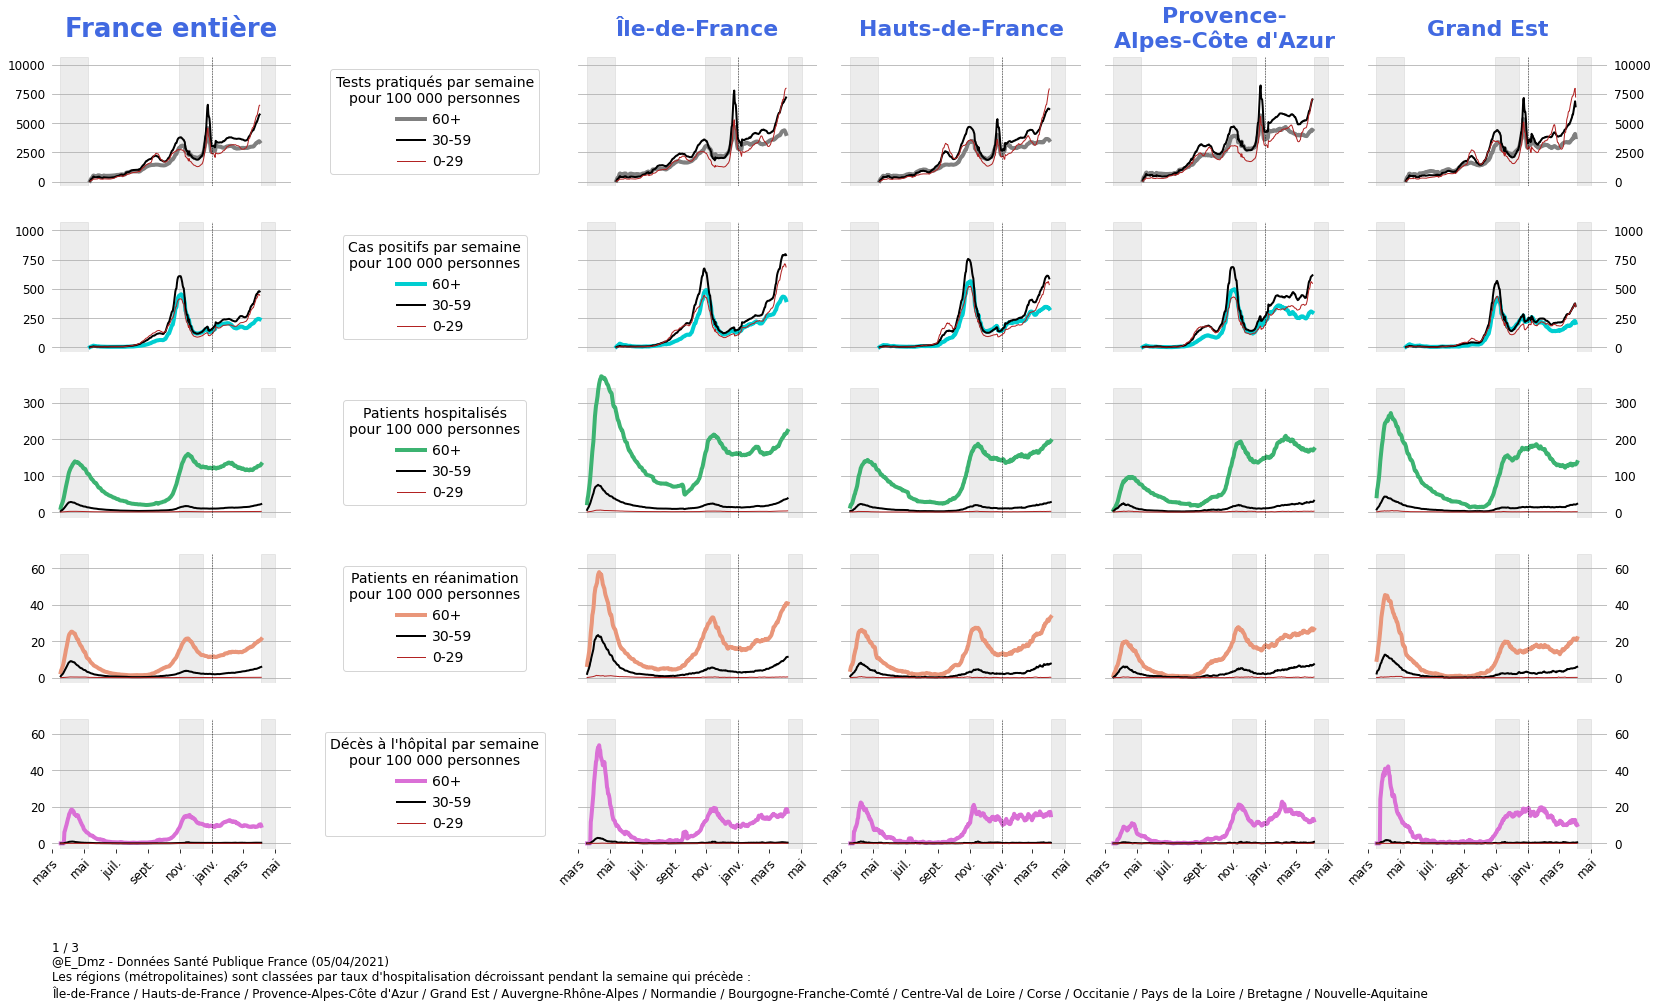

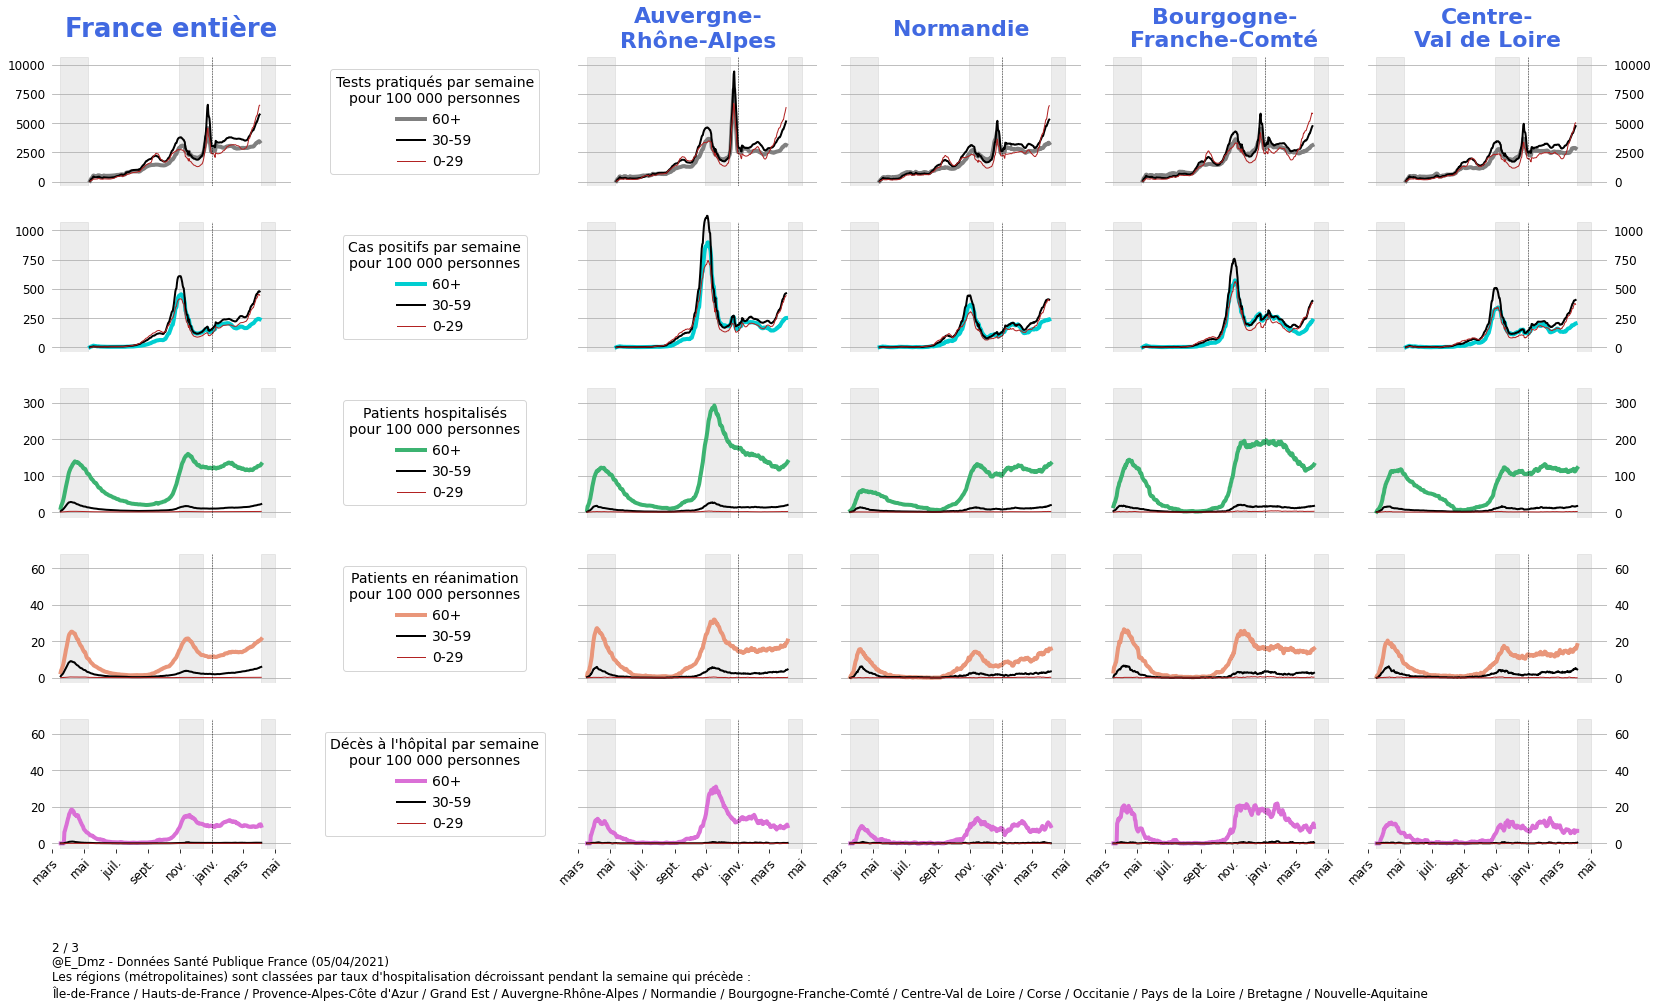

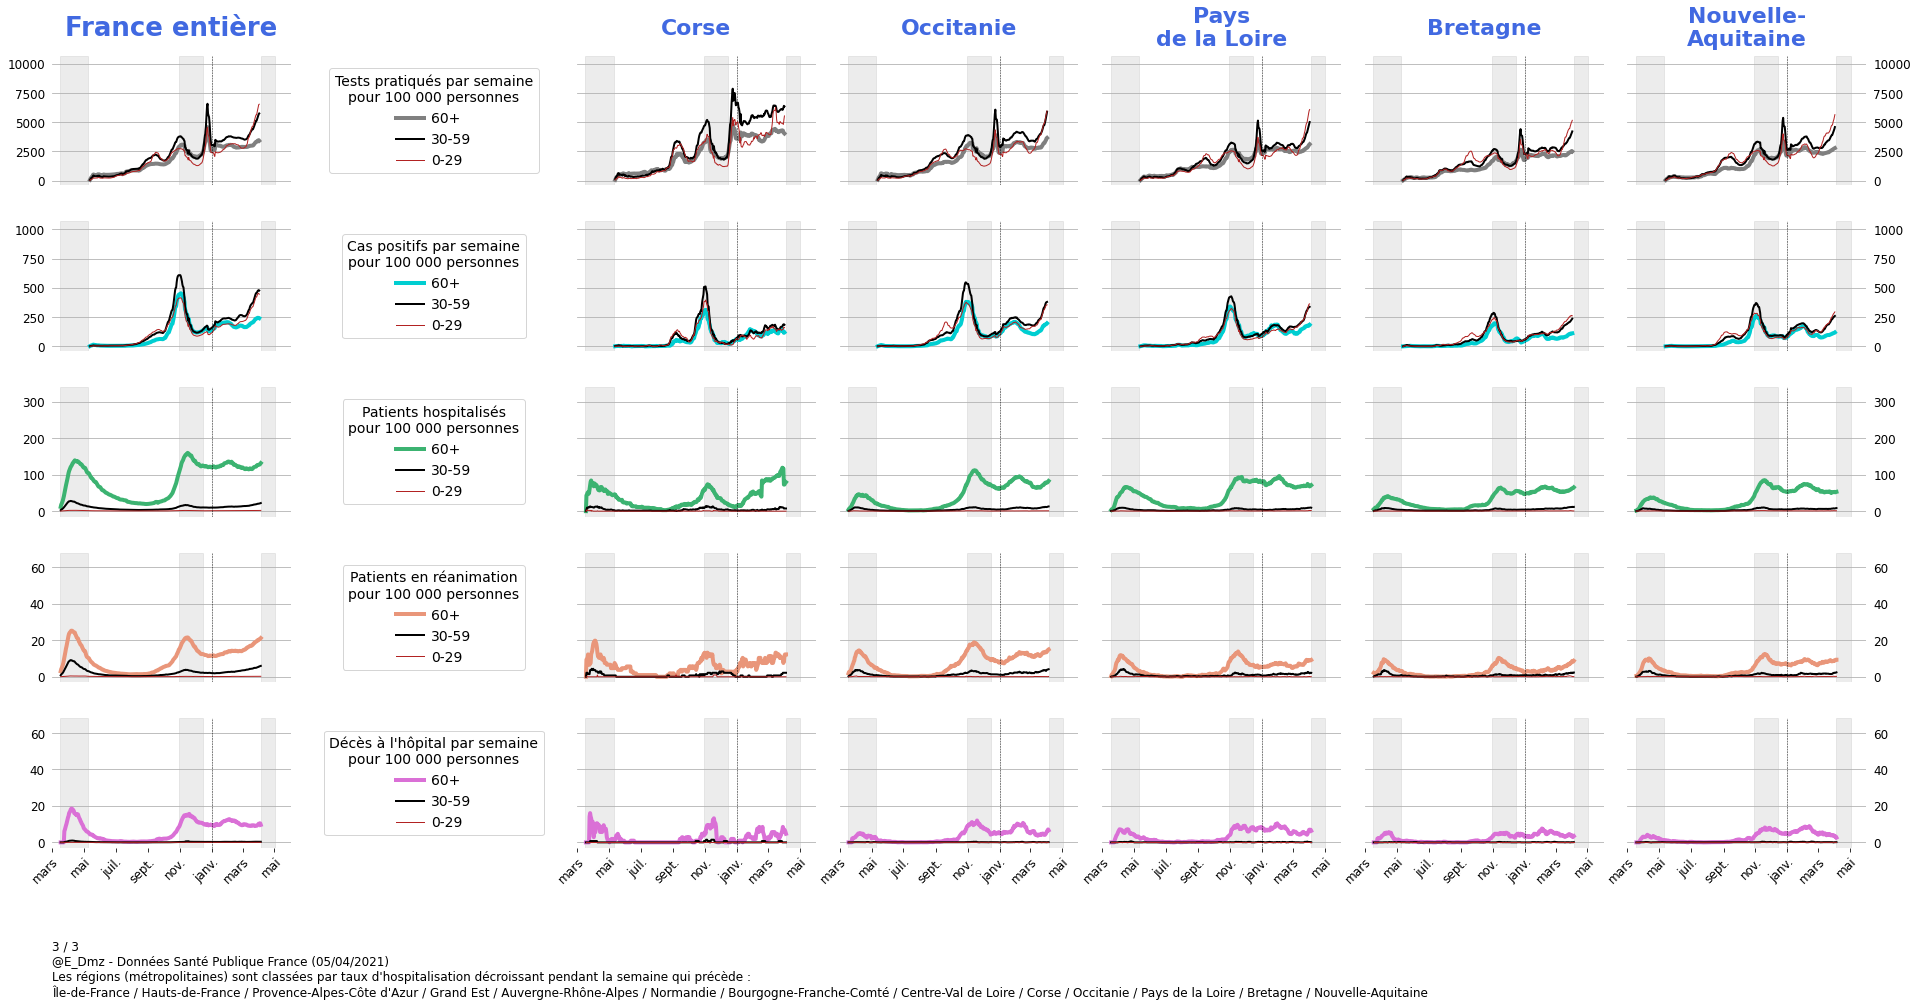

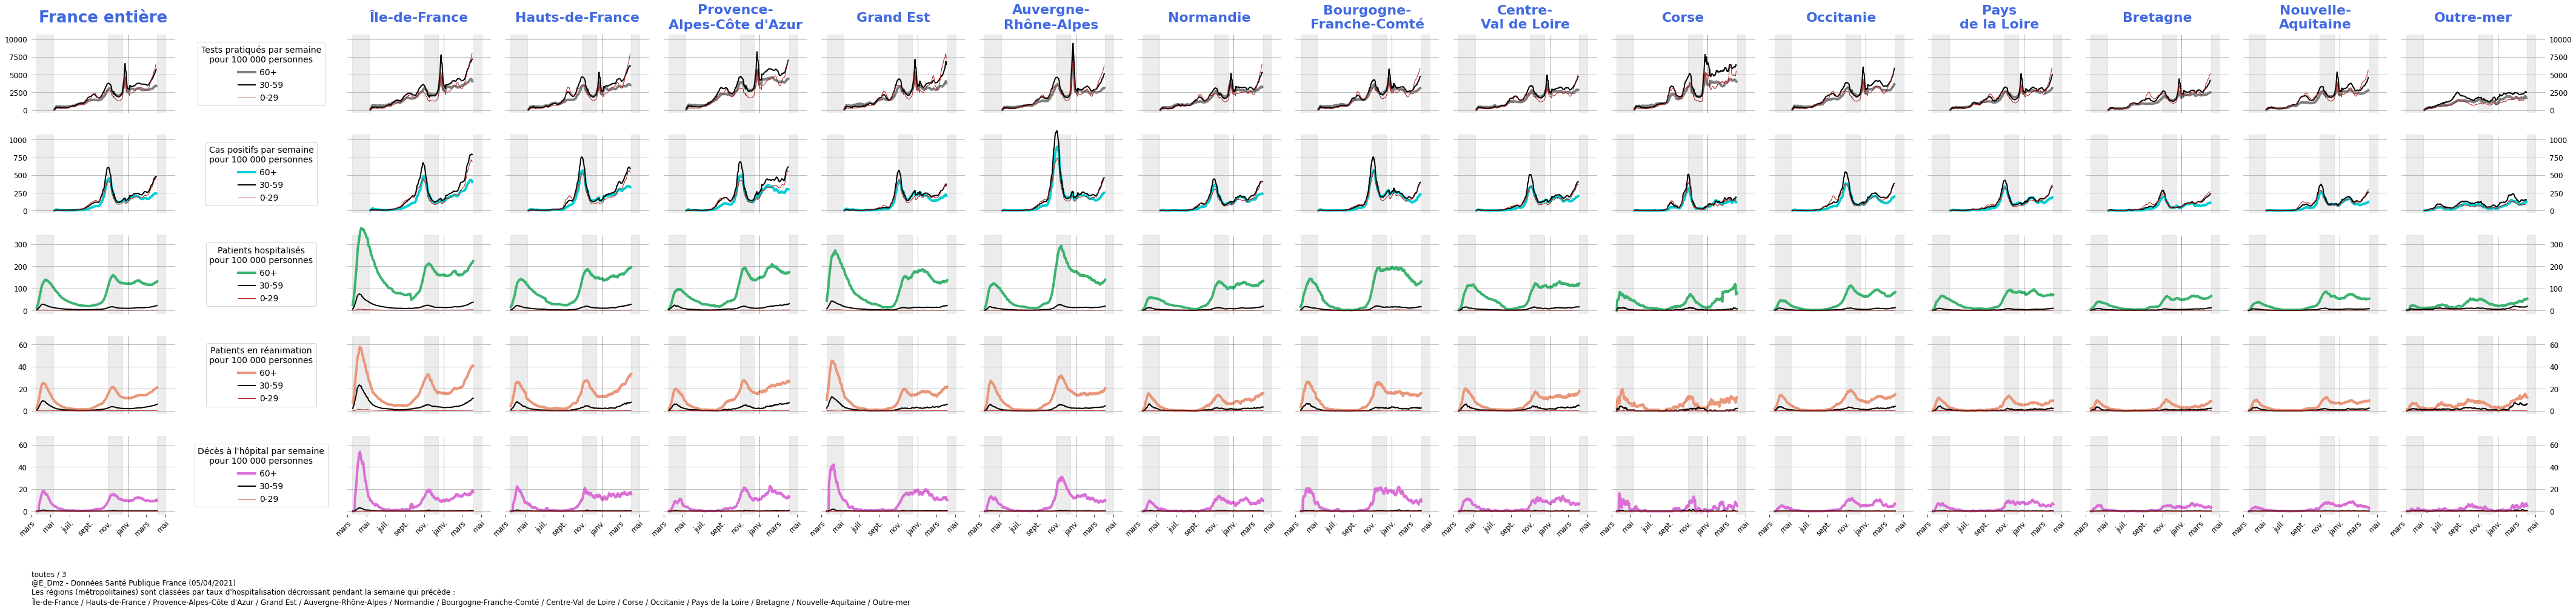

In [46]:
produce_fig_lines(d, regions_ordered[:4], regions_ordered[:-1], 1)
produce_fig_lines(d, regions_ordered[4:8], regions_ordered[:-1], 2)
produce_fig_lines(d, regions_ordered[8:-1], regions_ordered[:-1], 3)
produce_fig_lines(d, regions_ordered, regions_ordered, 'toutes')

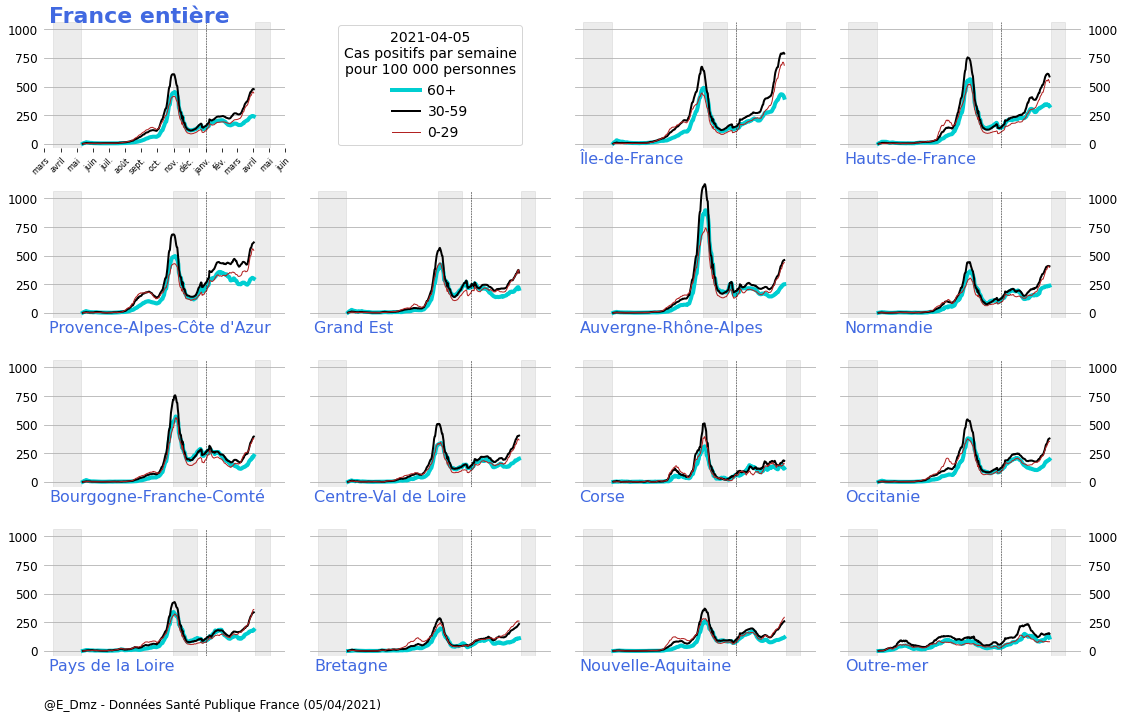

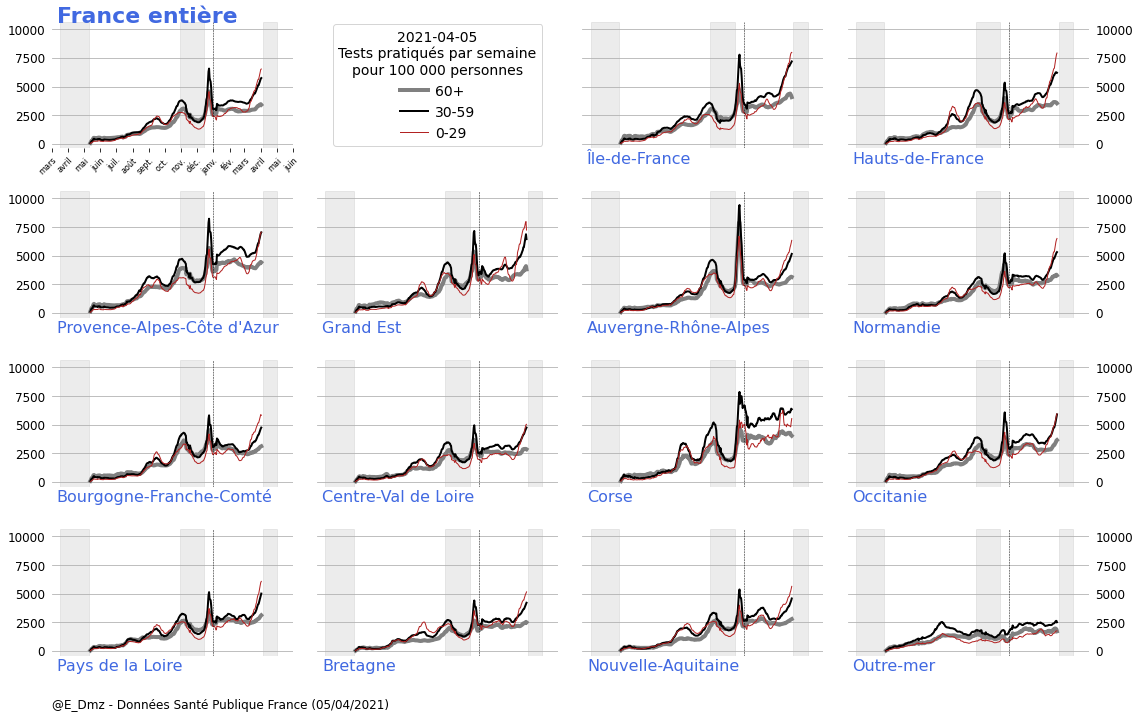

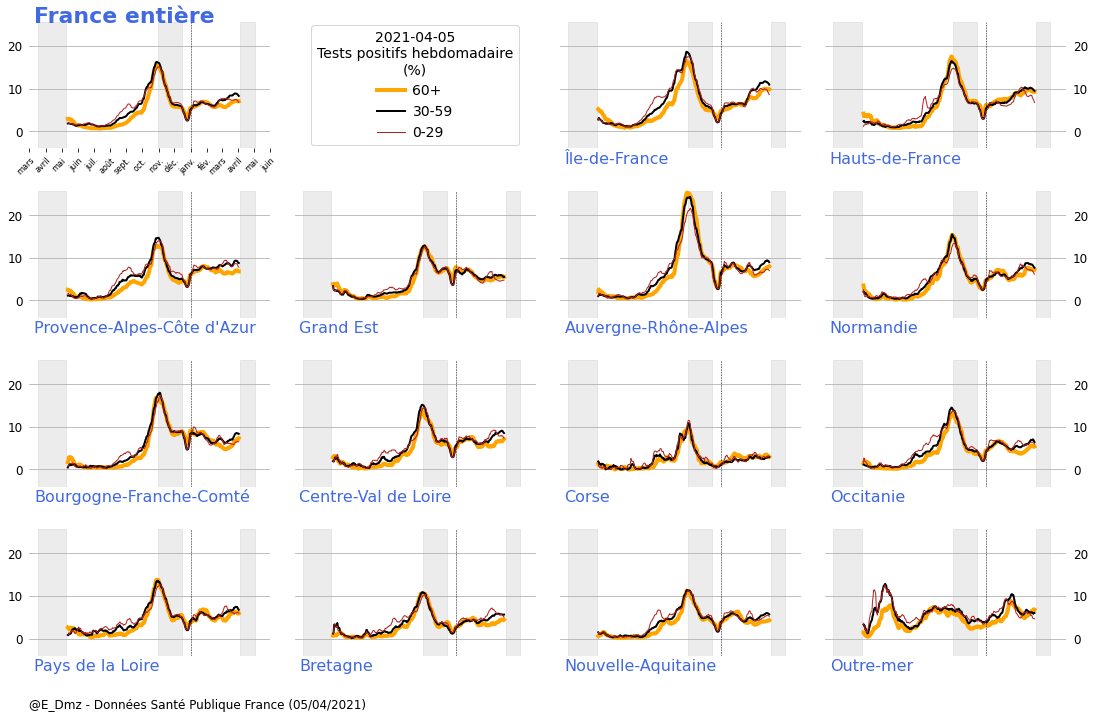

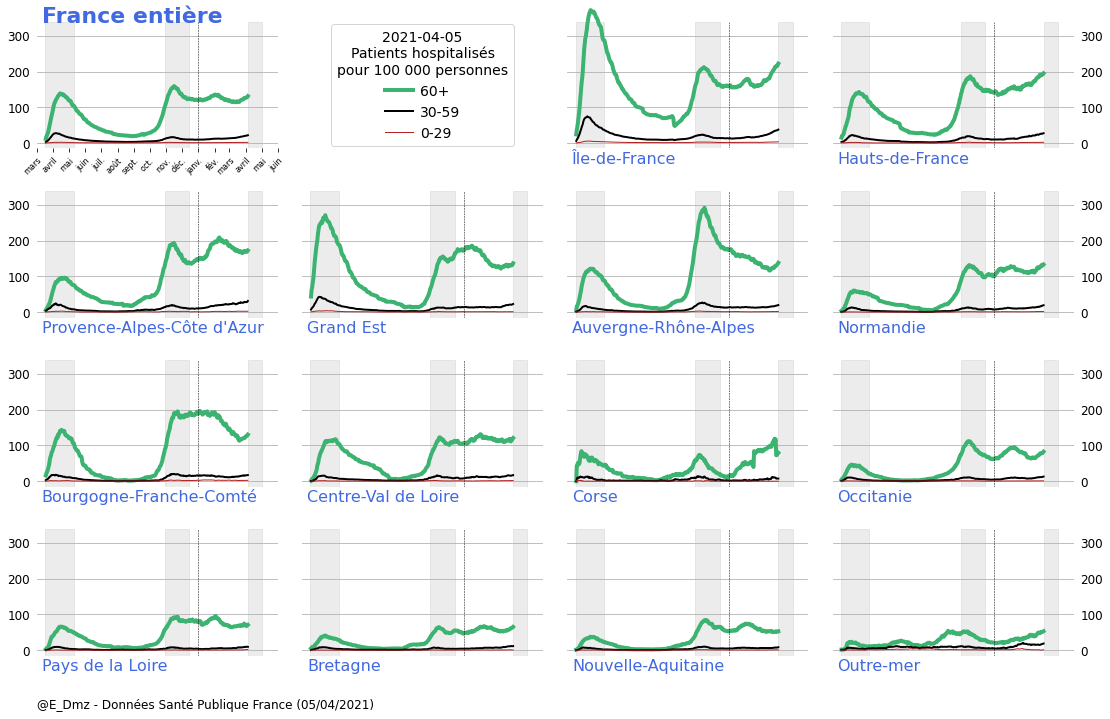

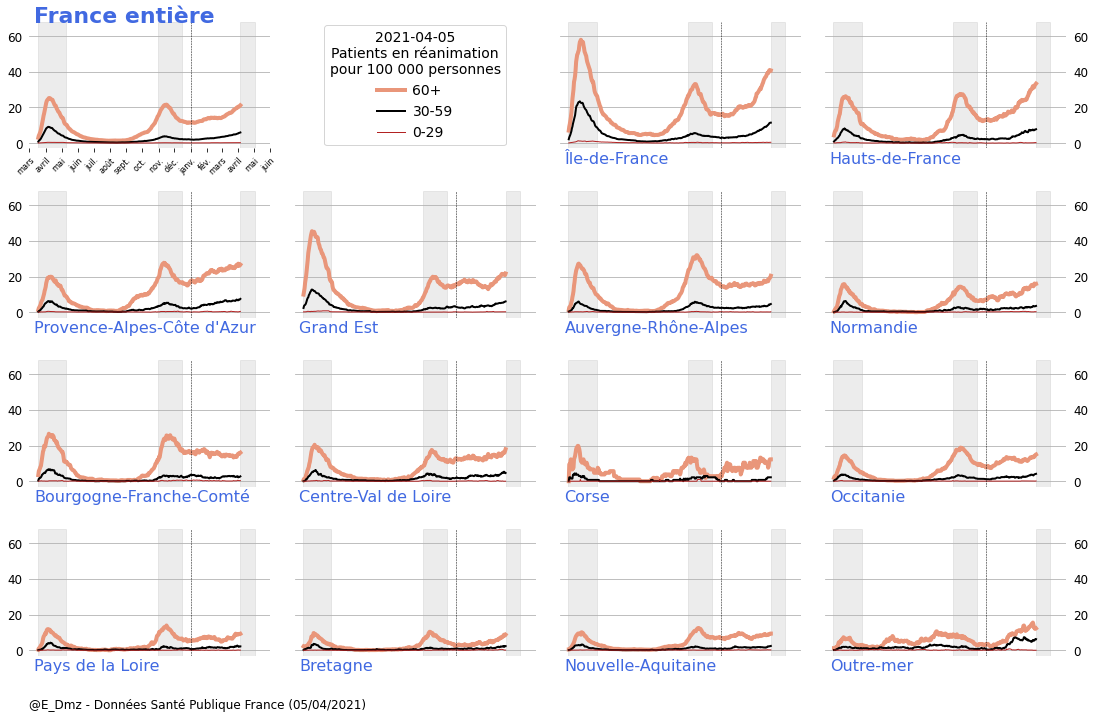

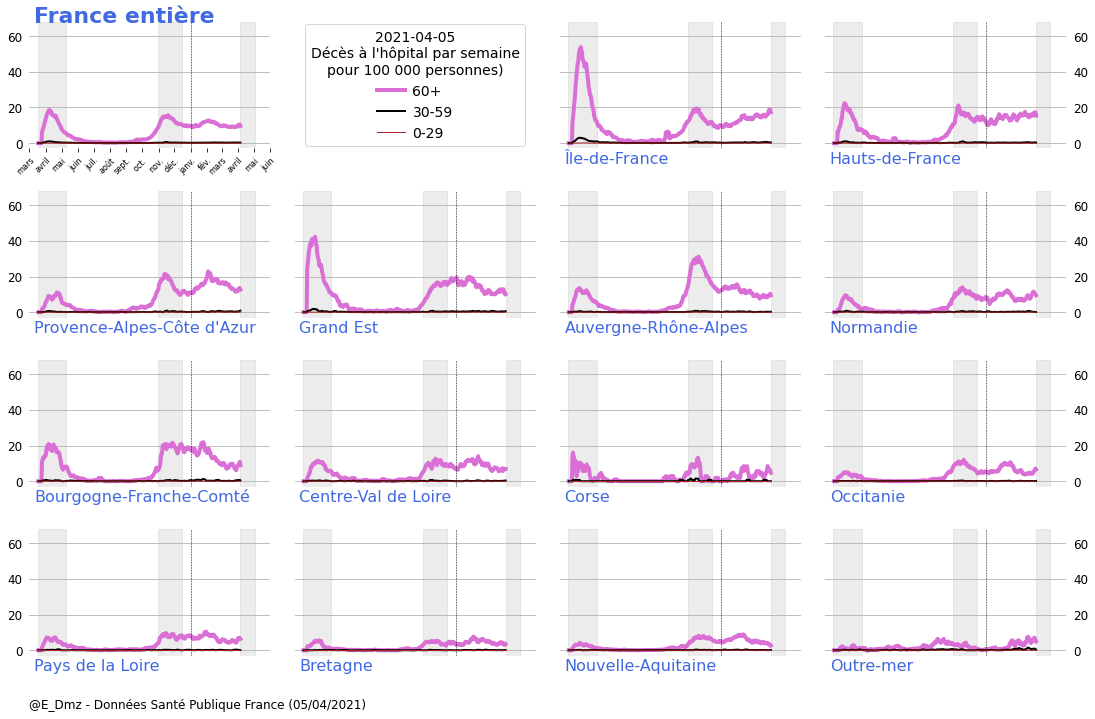

In [47]:
produce_fig(ymin = -40,
    ymax = 1190,
            d = d,
    column_to_plot = "incidence hebdo",
    main_color = "darkturquoise",
    title = '{}\nCas positifs par semaine\npour 100 000 personnes'.format(date),
    regions_ordered = regions_ordered,
    fname = fname_output_synth + '-fig-incidence.pdf',)
produce_fig(ymin = -400,
    ymax = 11900,
            d = d,
    column_to_plot = "taux de test hebdo",
    main_color = "gray",
    title = '{}\nTests pratiqués par semaine\npour 100 000 personnes'.format(date),
    regions_ordered = regions_ordered,
    fname = fname_output_synth + '-fig-tests.pdf',)
produce_fig(ymin = -4,
    ymax = 29,
            d = d,
    column_to_plot = "positivite hebdo",
    main_color = "orange",
    title = '{}\nTests positifs hebdomadaire\n(%)'.format(date),
    regions_ordered = regions_ordered,
    fname = fname_output_synth + '-fig-positifs.pdf',)
produce_fig(ymin = -15,
    ymax = 379,
            d = d,
    column_to_plot = "taux hosp",
    main_color = "mediumseagreen",
    title = '{}\nPatients hospitalisés\npour 100 000 personnes'.format(date),
    regions_ordered = regions_ordered,
    fname = fname_output_synth + '-fig-hosp.pdf',)
produce_fig(ymin = -3,
    ymax = 76,
            d = d,
    column_to_plot = "taux rea",
    main_color = "darksalmon",
    title = '{}\nPatients en réanimation\npour 100 000 personnes'.format(date),
    regions_ordered = regions_ordered,
    fname = fname_output_synth +  '-fig-rea.pdf',)
produce_fig(ymin = -3,
    ymax = 76,
            d = d,
    column_to_plot = "taux décès",
    main_color = "orchid",
    title = '{}\nDécès à l\'hôpital par semaine\npour 100 000 personnes)'.format(date),
    regions_ordered = regions_ordered,
    fname = fname_output_synth +  '-fig-deces.pdf',)